In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
import wrangle

### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

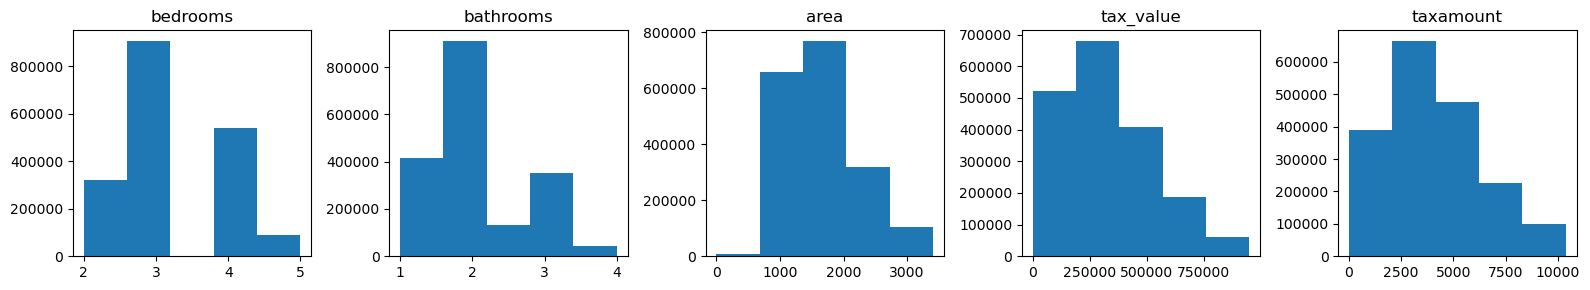

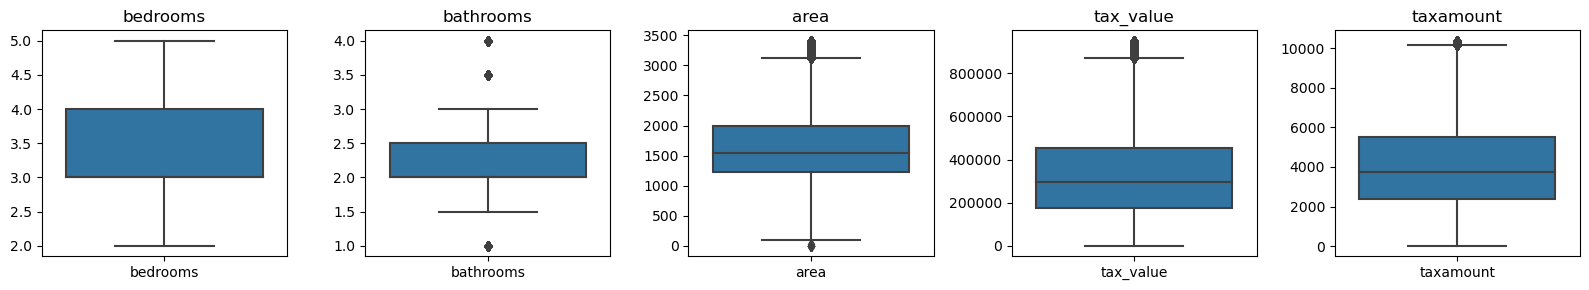

((1038959, 7), (445269, 7), (371057, 7))

In [2]:
train, validate, test = wrangle.wrangle_zillow()
train.shape, validate.shape, test.shape

In [3]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0


In [4]:
cont_var = ['area', 'taxamount', 'tax_value', 'year_built']

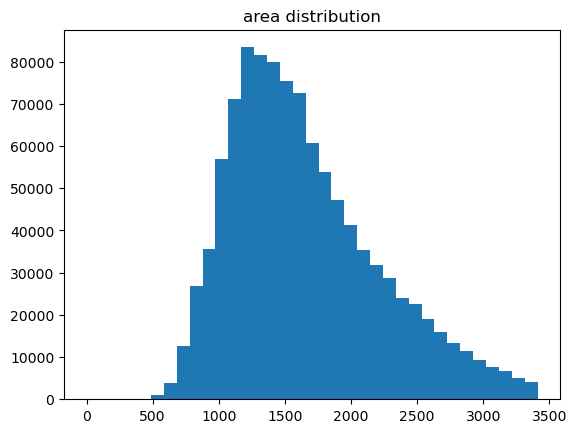

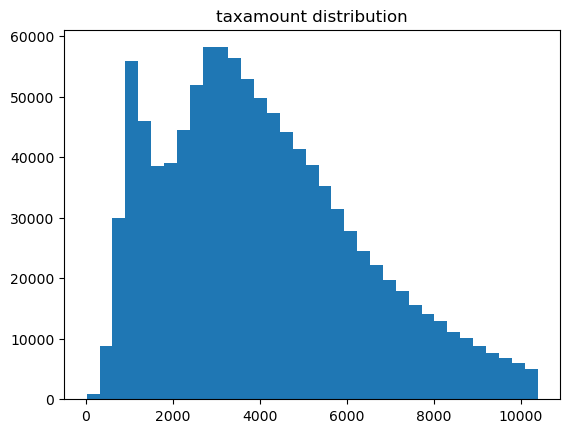

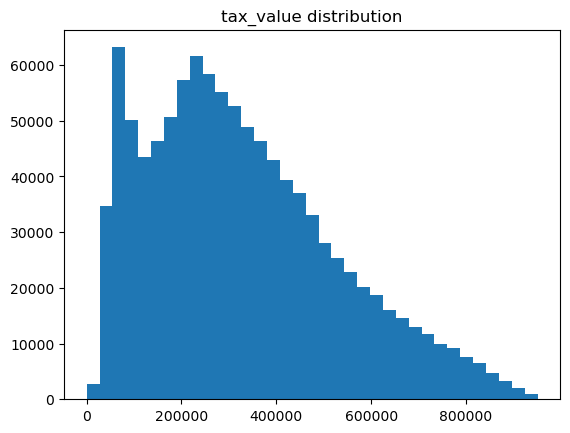

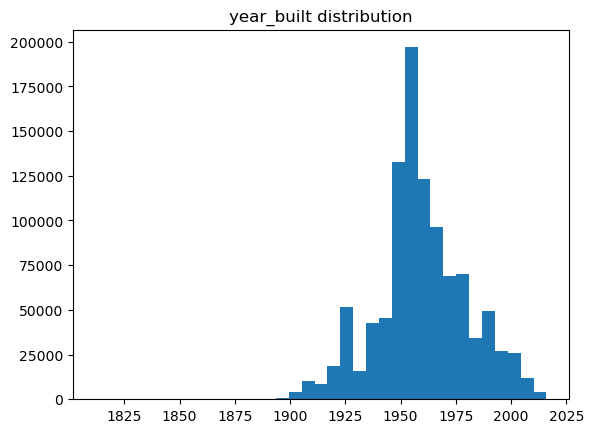

In [5]:
for col in cont_var:
    
    plt.hist(train[col], bins=35)
    plt.title(f'{col} distribution')
    plt.show()


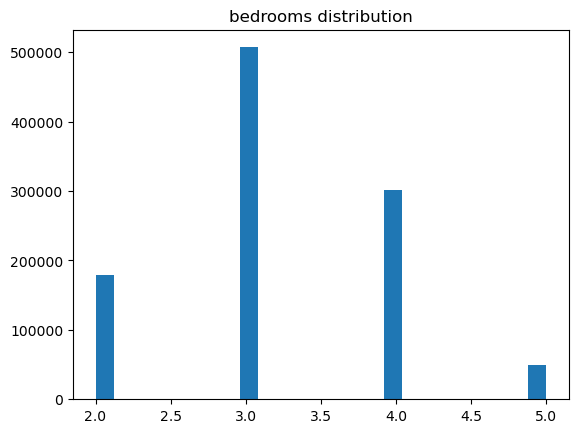

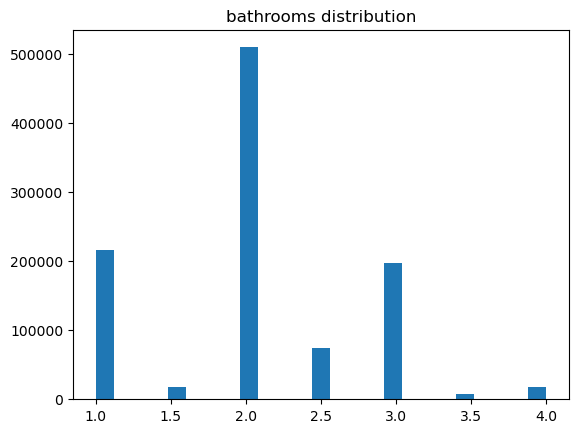

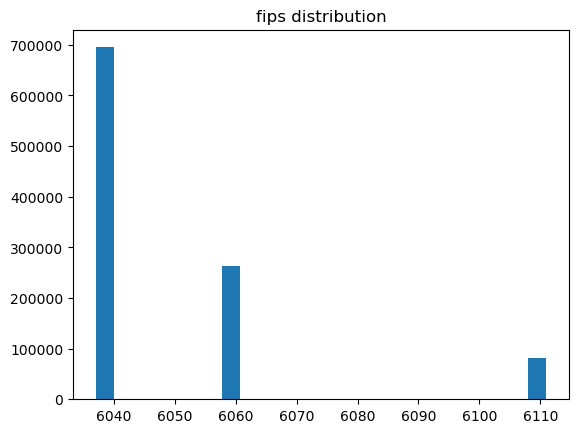

In [6]:
cat_var = ['bedrooms', 'bathrooms', 'fips']
    
for col in cat_var:

    
    plt.hist(train[col], bins=25)
    plt.title(f'{col} distribution')
    plt.show()

In [7]:
train_corr = train[cont_var].corr(method='spearman')
train_corr

,area,taxamount,tax_value,year_built
area,1.000000,0.386517,0.391546,0.494143
taxamount,0.386517,1.000000,0.973164,0.239995
tax_value,0.391546,0.973164,1.000000,0.245065
year_built,0.494143,0.239995,0.245065,1.000000


<AxesSubplot:>

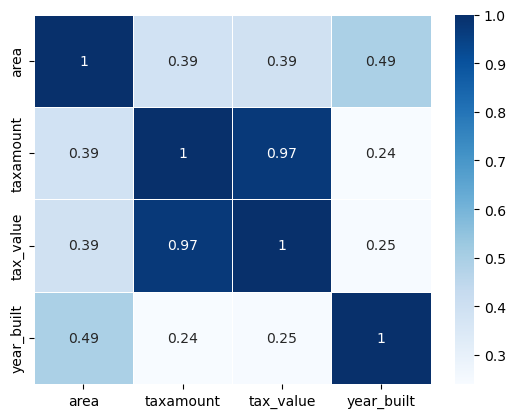

In [8]:
sns.heatmap(train_corr, cmap='Blues', annot=True, linewidth=0.5)

In [9]:
train_corr2 = train[cat_var].corr(method='spearman')
train_corr2

,bedrooms,bathrooms
bedrooms,1.000000,0.577489
bathrooms,0.577489,1.000000


<AxesSubplot:>

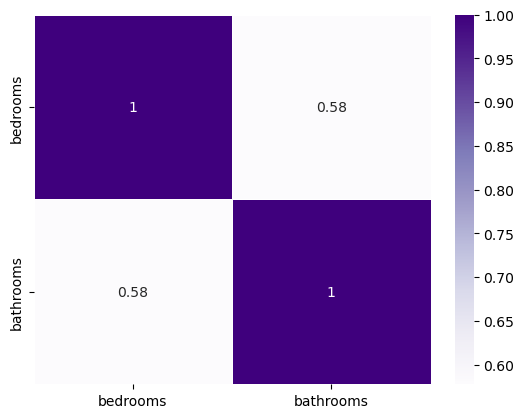

In [10]:
sns.heatmap(train_corr2, cmap='Purples', annot=True, linewidth=0.5)

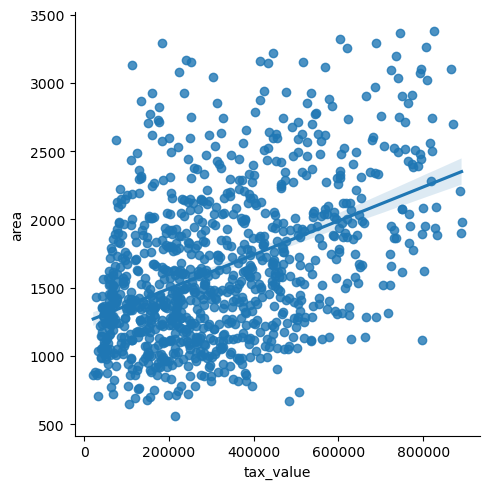

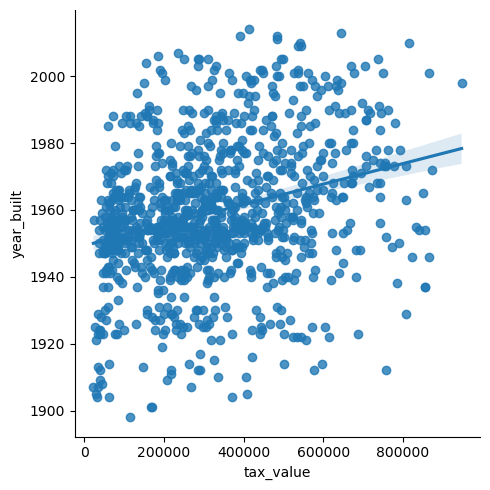

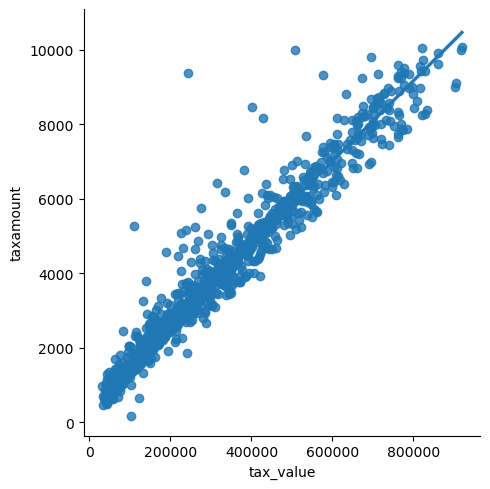

In [11]:
sns.lmplot(x='tax_value', y='area', data=train.sample(1000), scatter=True)
sns.lmplot(x='tax_value', y='year_built', data=train.sample(1000), scatter=True)
sns.lmplot(x='tax_value', y='taxamount', data=train.sample(1000), scatter=True)

In [12]:
cont_var

['area', 'taxamount', 'tax_value', 'year_built']

In [13]:
cat_var

['bedrooms', 'bathrooms', 'fips']

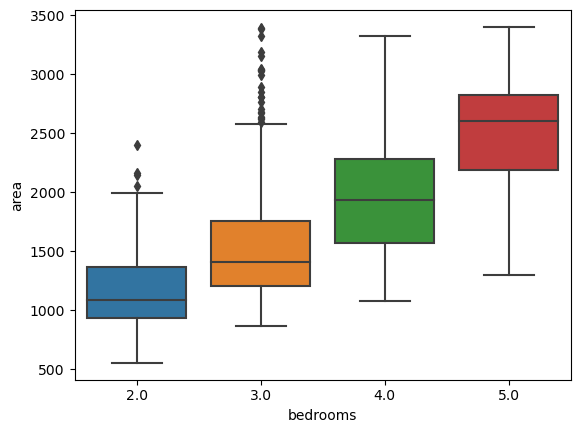

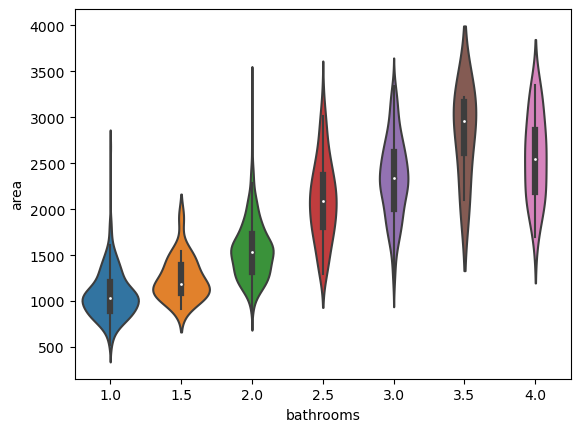

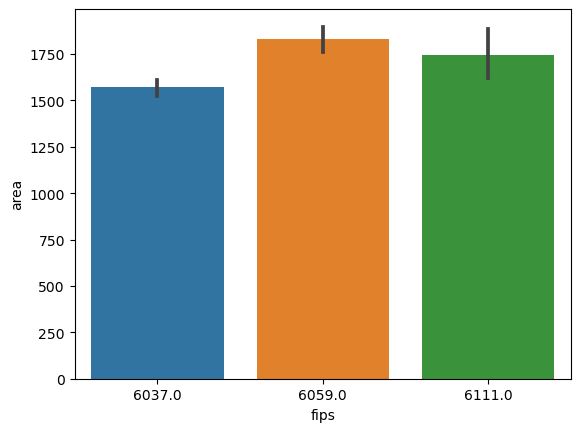

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


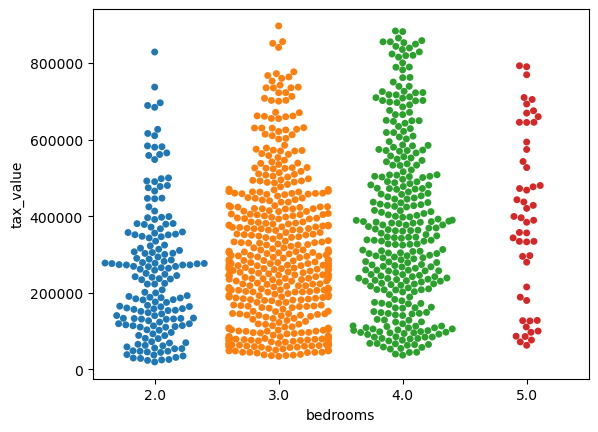

In [14]:
sns.boxplot(x='bedrooms', y='area', data=train.sample(1000))
plt.show()
sns.violinplot(x='bathrooms', y='area', data=train.sample(1000))
plt.show()
sns.barplot(x='fips', y='area', data=train.sample(1000))
plt.show()
sns.swarmplot(x='bedrooms', y='tax_value', data=train.sample(1000))
plt.show()

### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [15]:
def plot_variable_pairs(train, cont_var, cat_var):
# columns    
    cat_var = ['bedrooms', 'bathrooms', 'fips']
    cont_var = ['area', 'taxamount', 'tax_value', 'year_built']

#plots  
    sns.lmplot(x='tax_value', y='area', data=train.sample(1000), scatter=True)
    sns.lmplot(x='tax_value', y='year_built', data=train.sample(1000), scatter=True)
    sns.lmplot(x='tax_value', y='taxamount', data=train.sample(1000), scatter=True)


     
    return train, cont_var, cat_var


(         bedrooms  bathrooms    area  tax_value  year_built  taxamount    fips
 10057         4.0        2.0  1561.0   248240.0      1973.0    2504.40  6059.0
 2004970       3.0        2.0  1770.0    88390.0      1960.0    1671.93  6037.0
 306031        2.0        1.0  1452.0    81169.0      1946.0    1310.88  6037.0
 1038595       3.0        1.0  1000.0   119174.0      1950.0    1900.28  6037.0
 270959        3.0        2.0  1974.0   432268.0      1988.0    5315.27  6037.0
 ...           ...        ...     ...        ...         ...        ...     ...
 991122        3.0        1.0  1199.0   280857.0      1951.0    3282.40  6111.0
 1707759       4.0        2.0  1859.0    95008.0      1961.0    1463.61  6037.0
 1770246       3.0        3.0  2132.0   158470.0      1980.0    2037.38  6037.0
 1500741       2.0        1.0   780.0   477167.0      1955.0    6509.69  6037.0
 843328        3.0        1.0  1132.0   285700.0      1916.0    3563.75  6037.0
 
 [1038959 rows x 7 columns],
 ['area',

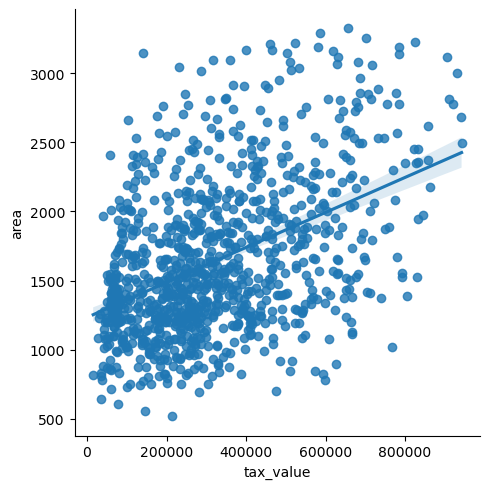

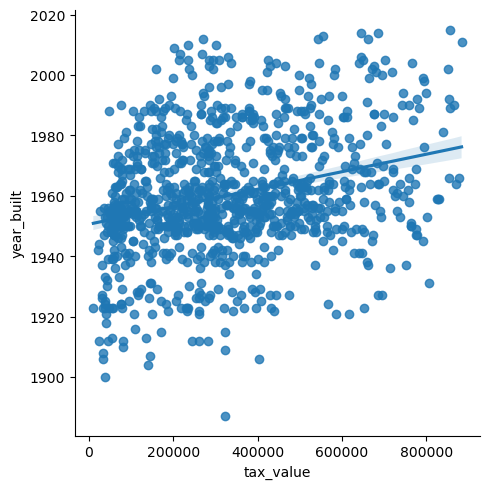

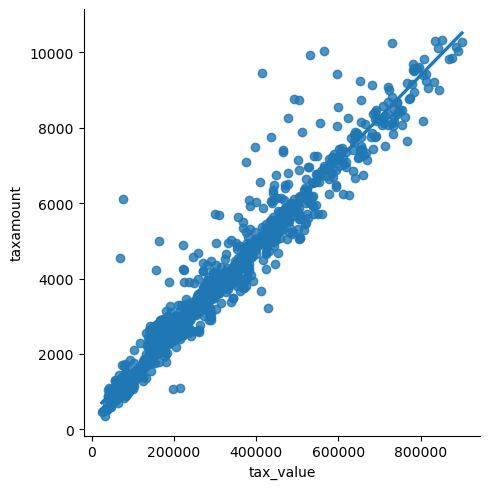

In [16]:
plot_variable_pairs(train, cont_var, cat_var)

### 4.Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [17]:
def plot_categorical_and_continuous_vars(train, cont_var, cat_var):
    
    # columns    
    cat_var = ['bedrooms', 'bathrooms', 'fips']
    cont_var = ['square_feet', 'tax_amount', 'tax_value', 'year_built']
    
    # plots
    sns.boxplot(x='bedrooms', y='tax_value', data=train.sample(1000))
    plt.show()
    sns.violinplot(x='bathrooms', y='tax_value', data=train.sample(1000))
    plt.show()
    sns.barplot(x='fips', y='tax_value', data=train.sample(1000))
    plt.show()
    
    return train, cont_var, cat_var

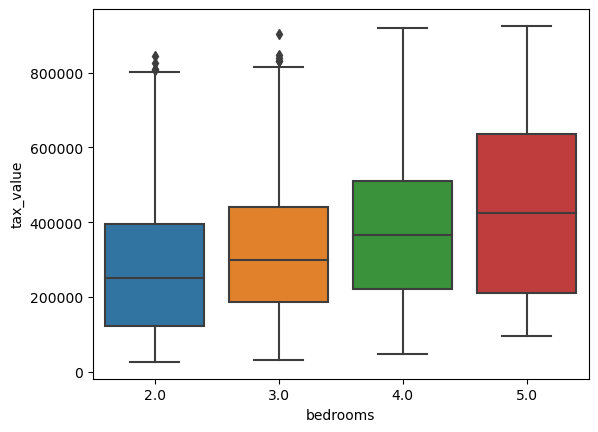

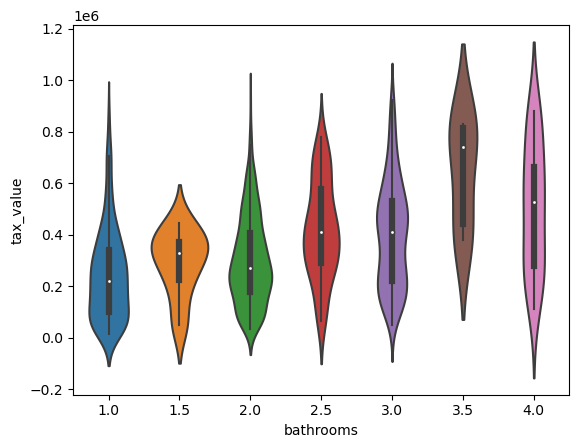

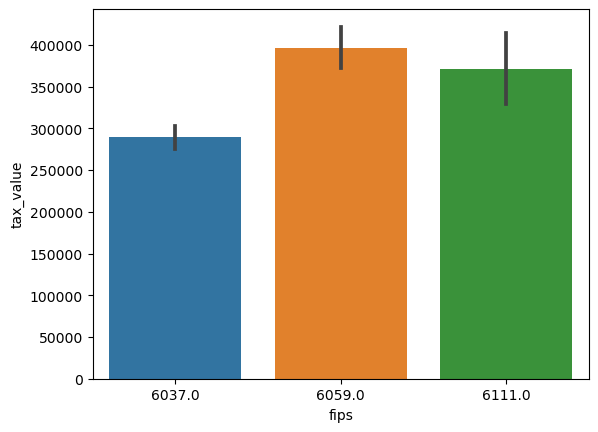

(         bedrooms  bathrooms    area  tax_value  year_built  taxamount    fips
 10057         4.0        2.0  1561.0   248240.0      1973.0    2504.40  6059.0
 2004970       3.0        2.0  1770.0    88390.0      1960.0    1671.93  6037.0
 306031        2.0        1.0  1452.0    81169.0      1946.0    1310.88  6037.0
 1038595       3.0        1.0  1000.0   119174.0      1950.0    1900.28  6037.0
 270959        3.0        2.0  1974.0   432268.0      1988.0    5315.27  6037.0
 ...           ...        ...     ...        ...         ...        ...     ...
 991122        3.0        1.0  1199.0   280857.0      1951.0    3282.40  6111.0
 1707759       4.0        2.0  1859.0    95008.0      1961.0    1463.61  6037.0
 1770246       3.0        3.0  2132.0   158470.0      1980.0    2037.38  6037.0
 1500741       2.0        1.0   780.0   477167.0      1955.0    6509.69  6037.0
 843328        3.0        1.0  1132.0   285700.0      1916.0    3563.75  6037.0
 
 [1038959 rows x 7 columns],
 ['square

In [18]:
plot_categorical_and_continuous_vars(train, cont_var, cat_var)

### MORE EXPLORE

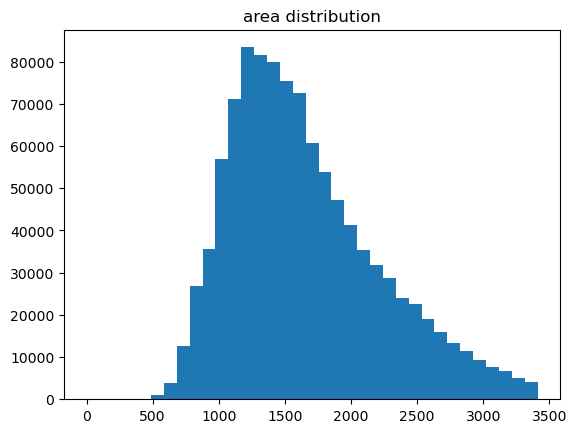

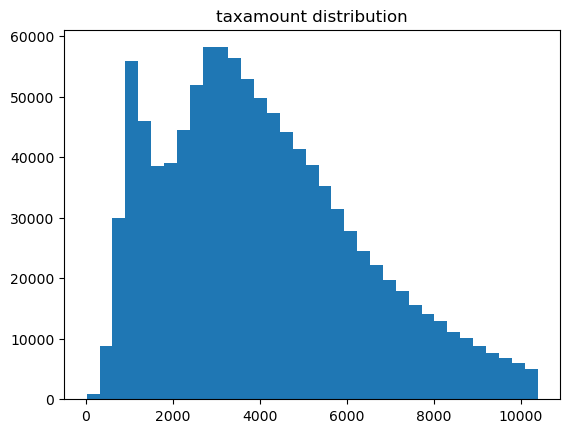

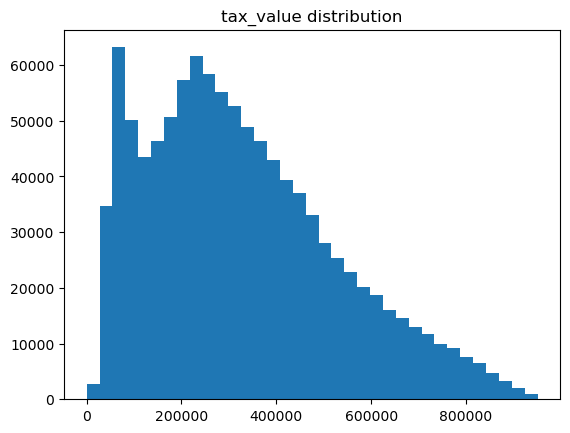

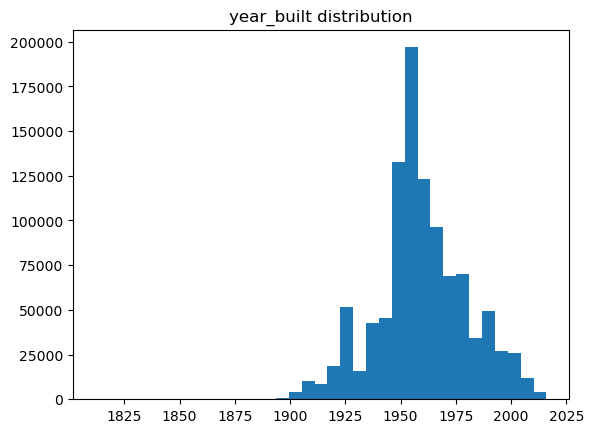

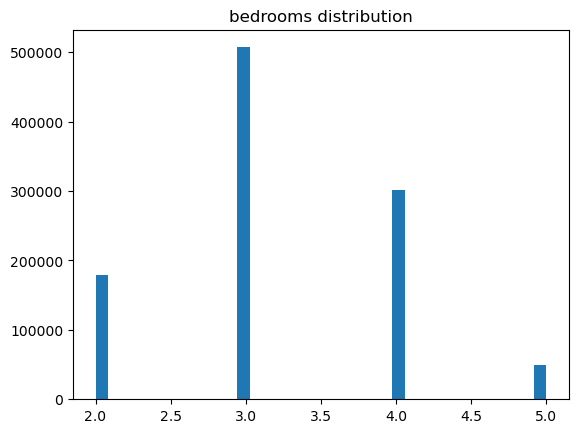

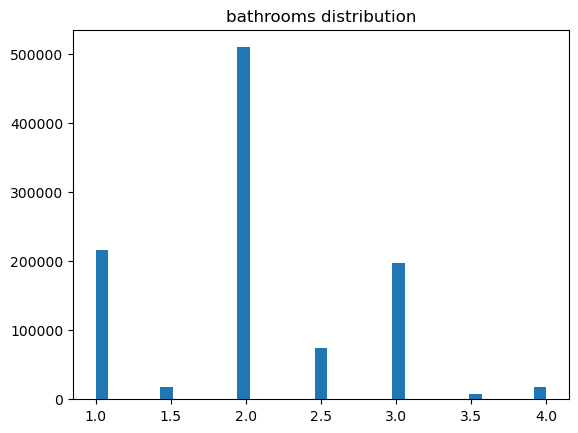

In [19]:
cont_var2 = ['area', 'taxamount', 'tax_value', 'year_built', 'bedrooms', 'bathrooms']
for col in cont_var2:
    
    plt.hist(train[col], bins=35)
    plt.title(f'{col} distribution')
    plt.show()


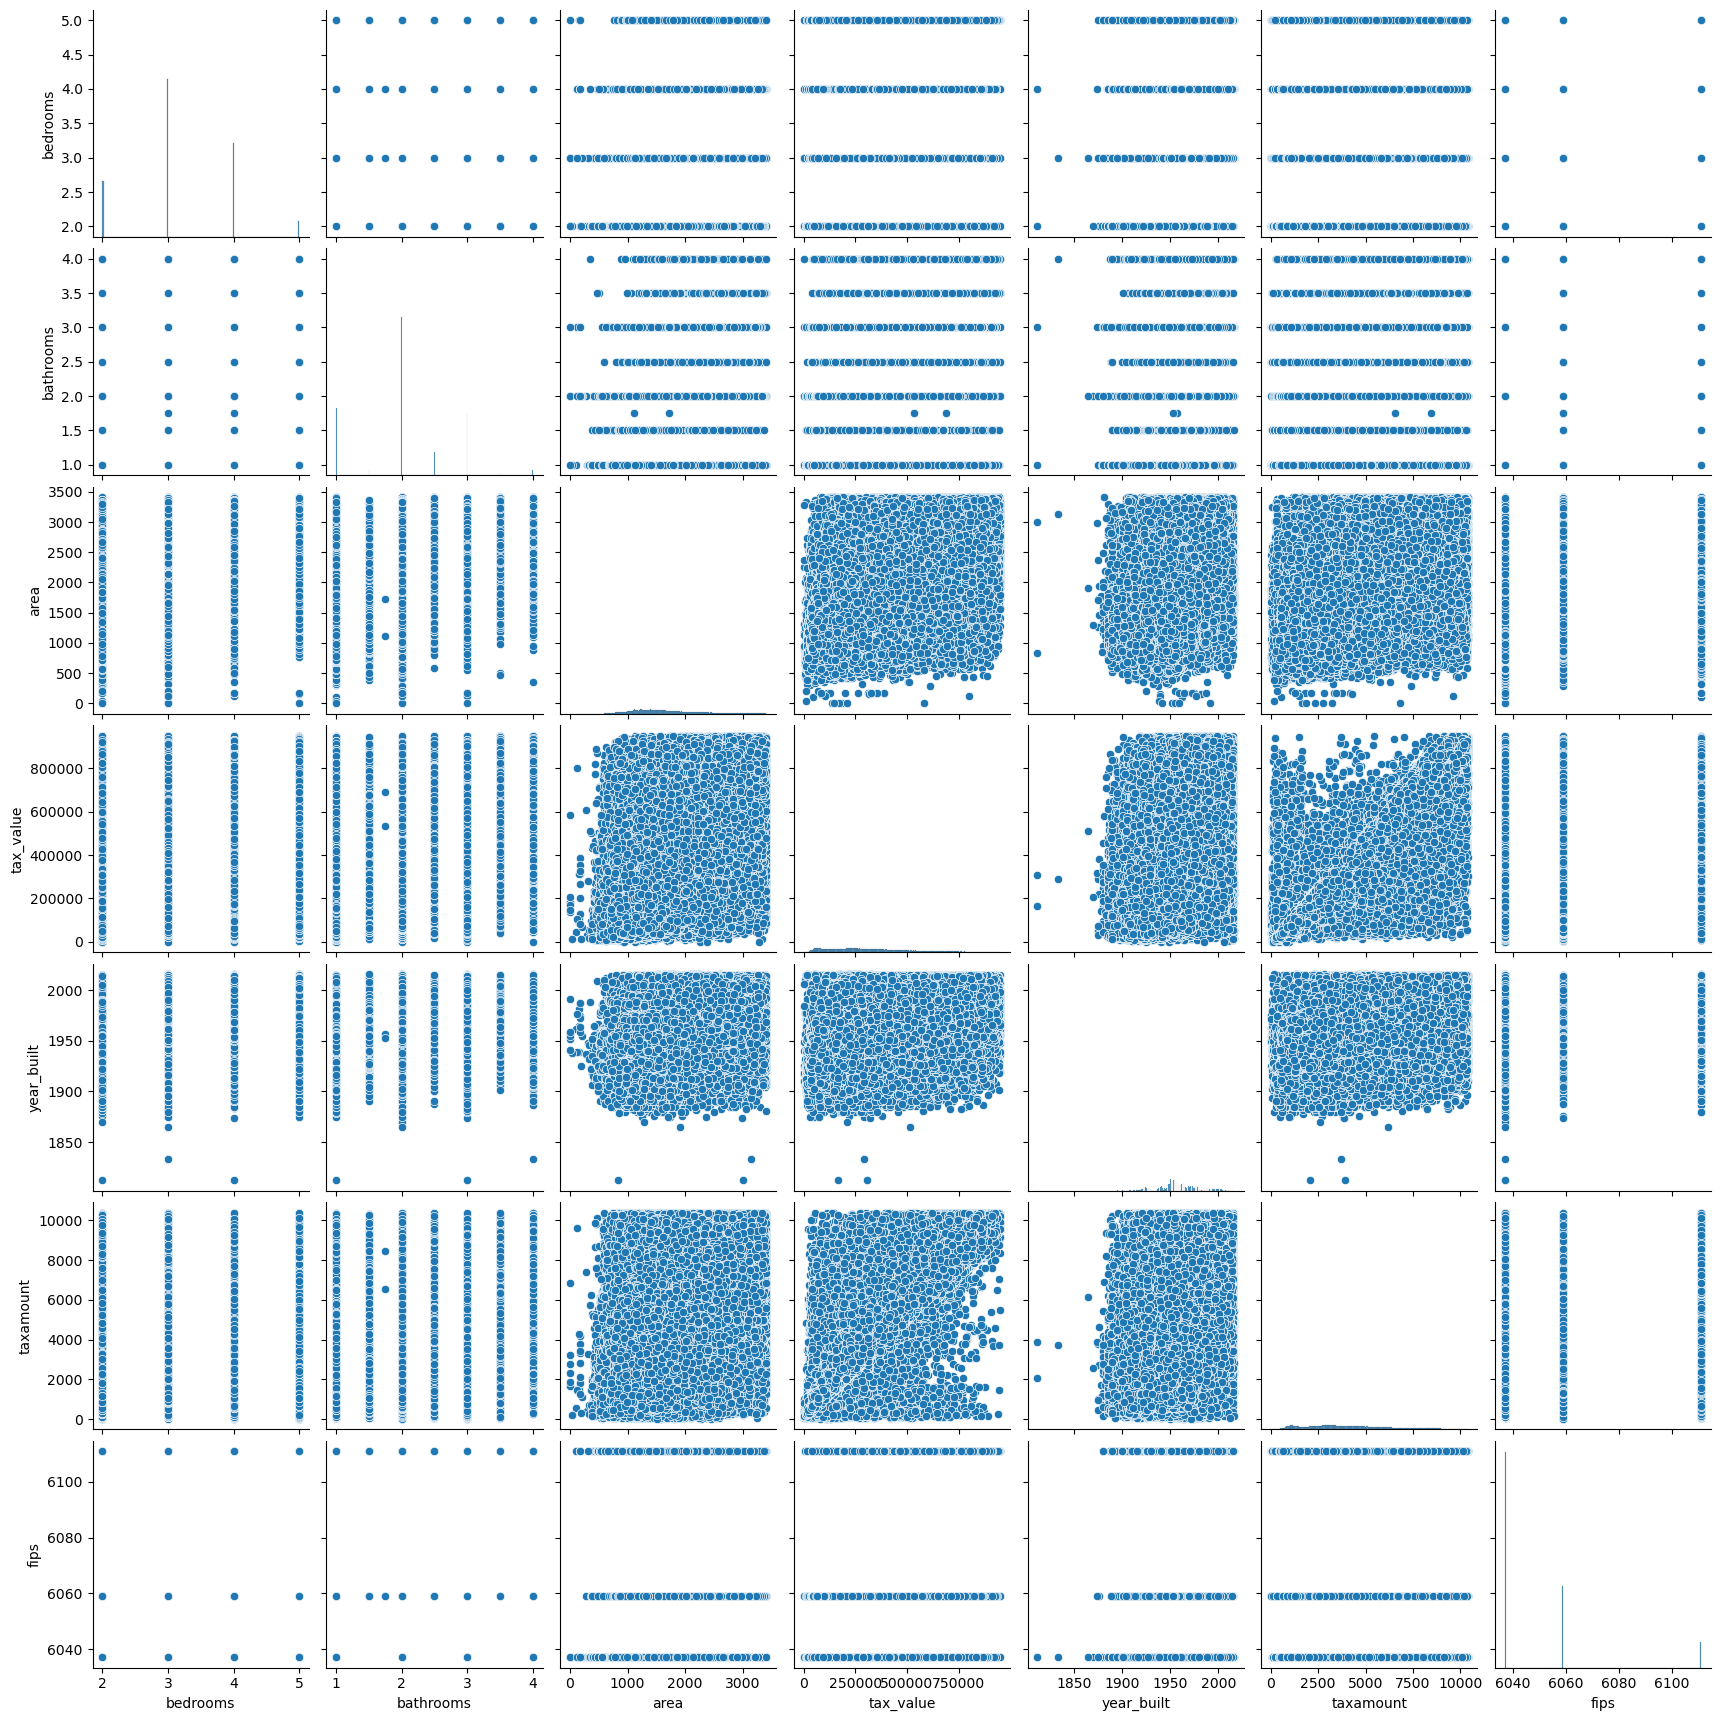

In [20]:
sns.pairplot(train)

In [21]:
sample_train = train.sample(50000)

In [27]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1129965 to 289956
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    50000 non-null  float64
 1   bathrooms   50000 non-null  float64
 2   area        50000 non-null  float64
 3   tax_value   50000 non-null  float64
 4   year_built  50000 non-null  float64
 5   taxamount   50000 non-null  float64
 6   fips        50000 non-null  object 
dtypes: float64(6), object(1)
memory usage: 4.1+ MB
